# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：0205_m3-6

1. 4個變數：隔夜拆款利率、臺北市戶數、臺北市核發建築物建造執照H類住宅戶數、房價指數

2. Lag = 4

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{household}\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0\\
a_{21} &a_{22} &0 &0\\
a_{31} &a_{32} &a_{33} &0\\
a_{41} &a_{42} &a_{43} &a_{44}\\
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hd}\\
	e_t^{hs}\\
	e_t^{sp}
\end{array}
\right]
$$

### 環境設定

In [1]:
# 設定路徑
#Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
#setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Loading required package: matrixcalc

Loading required package: lattice



In [2]:
options(warn=-1)    # 關掉warning
#options(warn=0)
options(scipen=999) #不要科學記號

### 讀資料

In [3]:
###### 讀取資料 ######
file = "data/df_TPE.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 4-variable model
By <- data %>% select(interest_rate, household, permit_hh, hp) %>% as.matrix

# Raw Data

In [4]:
dim(By)

[1] 111   4

In [5]:
data$Date <- as.Date(data$Date)

In [6]:
i_level <- ggplot(data, aes(x = Date, y = interest_rate))+
    geom_line()

permit_level <- ggplot(data, aes(x = Date, y = permit_hh))+
    geom_line()

household_level <- ggplot(data, aes(x = Date, y = household))+
    geom_line()

sentiment_level <- ggplot(data, aes(x = Date, y = Sentiment))+
    geom_line()

hp_level <- ggplot(data, aes(x = Date, y = hp))+
    geom_line()

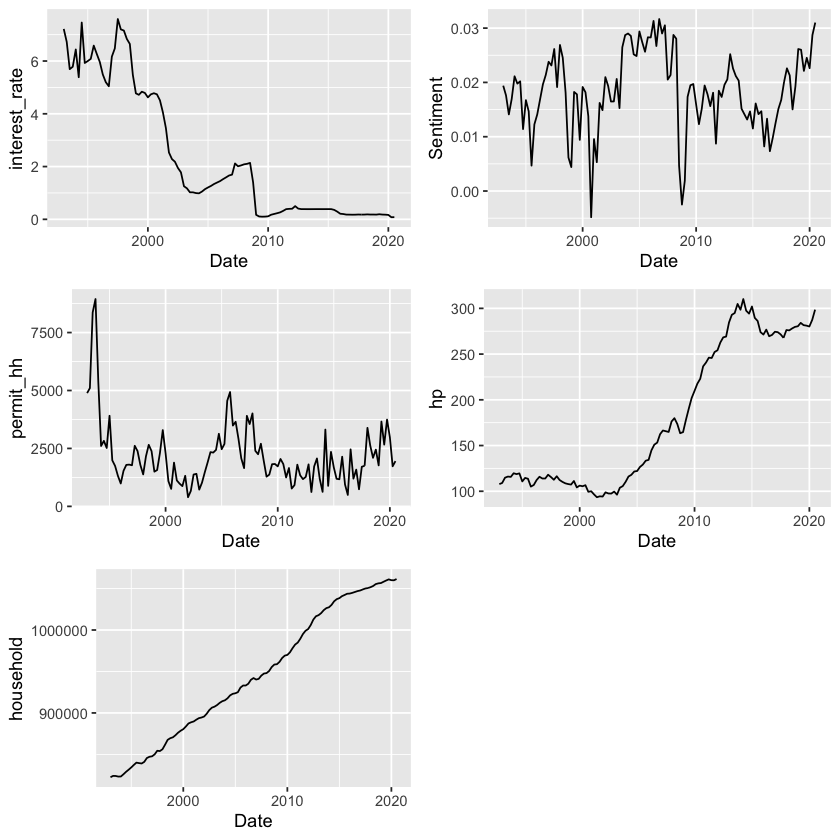

In [7]:
multiplot(i_level,permit_level,
          household_level, sentiment_level,
          hp_level,
          cols = 2)

In [8]:
ggsave(filename = "raw.png", 
       plot = multiplot(i_level,
                        household_level, permit_level,
                        hp_level,
                        cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

### 模型設定

In [9]:
#----- 模型設定 -----#
VAR.P = 4                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [10]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.7295165,-0.00004477204,0.00003330089,0.01507367,0.3943975,0.0000134115,-0.00001515666,-0.006194114,-0.2170033,0.0000009837438,0.00005329251,-0.01112693,-0.04408498,0.00002132041,-0.00004904753,0.007946682,7.931948
-417.6379514,1.63606195141,-0.11378218638,34.11663510,395.0546719,-1.3466829326,-0.03297018988,-15.071090945,-218.8388460,1.1710895227006,-0.03724804885,2.38162638,46.50343280,-0.47739341716,0.05572367317,-12.074476400,16210.095730
81.8916203,0.02378376090,0.40956713057,-2.82485241,323.3771372,-0.1575206653,0.05353029677,17.849002049,-472.7512527,0.1793478421135,-0.06077072738,-13.95117165,87.79675761,-0.03938126147,0.13953978923,-6.924381036,-3852.092390
-0.8967065,-0.00082300715,-0.00074230777,1.02726562,-3.3353131,0.0014496513,0.00050129034,0.169217942,3.3482411,-0.0007115577822,0.00095866922,-0.04159754,-0.38558021,0.00005713956,-0.00076741619,-0.155283298,30.695435


0.14106665,-12.14287,50.55063,0.05703522
-12.14287450,1236020.91579,36995.15995,1092.42057762
50.55063232,36995.15995,574190.01968,194.22619397
0.05703522,1092.42058,194.22619,26.25901410


0.11865419,-10.21363,42.51922,0.04797355
-10.21363276,1039643.76095,31117.42426,918.85842978
42.51922345,31117.42426,482963.56796,163.36782671
0.04797355,918.85843,163.36783,22.08702120


### AIC/SIC

In [11]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 27.83005

AIC,29.98529,29.99645,29.41033,29.10107
SIC,30.47629,30.88534,30.70172,30.79969
HQ,30.18444,30.35693,29.93394,29.78967


AIC SIC  HQ 
  4   1   4

### 選擇lag期數

In [12]:
# 依據AIC選擇
VAR.P = 4

# SVAR

## Identification

In [13]:
### 4-variable model

Amat = diag(4)
# Identification Conditions

Amat[2,1]  = NA; 
Amat[3,1]  = NA; Amat[3,2]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,3]  = NA;

Bmat = diag(4)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0
NA,1,0,0
NA,NA,1,0
NA,NA,NA,1


NA,0,0,0
0,NA,0,0
0,0,NA,0
0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

* Recall 模型設定:

$$D(L)Y_t = Be_t$$

可以推得:

$$Y_t = \Phi_1 Y_{t-1} + \dots + \Phi_p Y_{t-p} + \varepsilon_t $$

1. 為 $A, B$ matrix 加上 zero constraints

2. 從$\Sigma_\varepsilon = CC'$知道 cholesky decomposition的 $C = (I-D_0)^{-1}B = A^{-1}B$ 

In [14]:
C.Prime <- chol(Sigma.OLS)

In [15]:
C <- t(C.Prime)
C

0.3755884,0.000000,0.0000000,0.000000
-32.3302695,1111.294592,0.0000000,0.000000
134.5905014,37.205713,744.7759069,0.000000
0.1518557,0.987434,0.1840147,5.022655


令 

$$
A = \left[
\begin{array}{ccccc}
1 &0 &0 &0\\
a_{21} &1 &0 &0\\
a_{31} &a_{32} &1 &0\\
a_{41} &a_{42} &a_{43} &1\\
\end{array}
\right]
$$

$$
B = \left[
\begin{array}{ccccc}
\sigma_1 &0 &0 &0\\
0 &\sigma_2 &0 &0\\
0 &0 &\sigma_3 &0\\
0 &0 &0 &\sigma_4\\
\end{array}
\right]
$$

### Note: Solving system of linear equations

由於 $B, C$已知，又$AC = B$，故$A = BC^{-1}$

In [16]:
B0 <- diag(diag(C), ncol = 4, nrow = 4)
B0

0.3755884,0.000,0.0000,0.000000
0.0000000,1111.295,0.0000,0.000000
0.0000000,0.000,744.7759,0.000000
0.0000000,0.000,0.0000,5.022655


In [17]:
A0 <- B0 %*% solve(C)
A0

1.0000000,0.000000000,0.0000000000,0
86.0789863,1.000000000,0.0000000000,0
-361.2276177,-0.033479613,1.0000000000,0
-0.3915491,-0.000880272,-0.0002470739,1


In [18]:
SVAR_AB_est <- list("A0.svar" = A0, "B0.svar" = B0)

## IRF (without Bootstrap C.I.)

In [19]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 16) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:4){
    for(i in 1:4){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [20]:
#output entire table
IRF_TABLE <- df_IRF_plot[1:120,13:16] %>% select(mp=1,hd=2,hs=3,hp=4)
write.table(IRF_TABLE, file = "result/table/IRF_TABLE.csv", sep = ",", row.names = FALSE)

In [21]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))

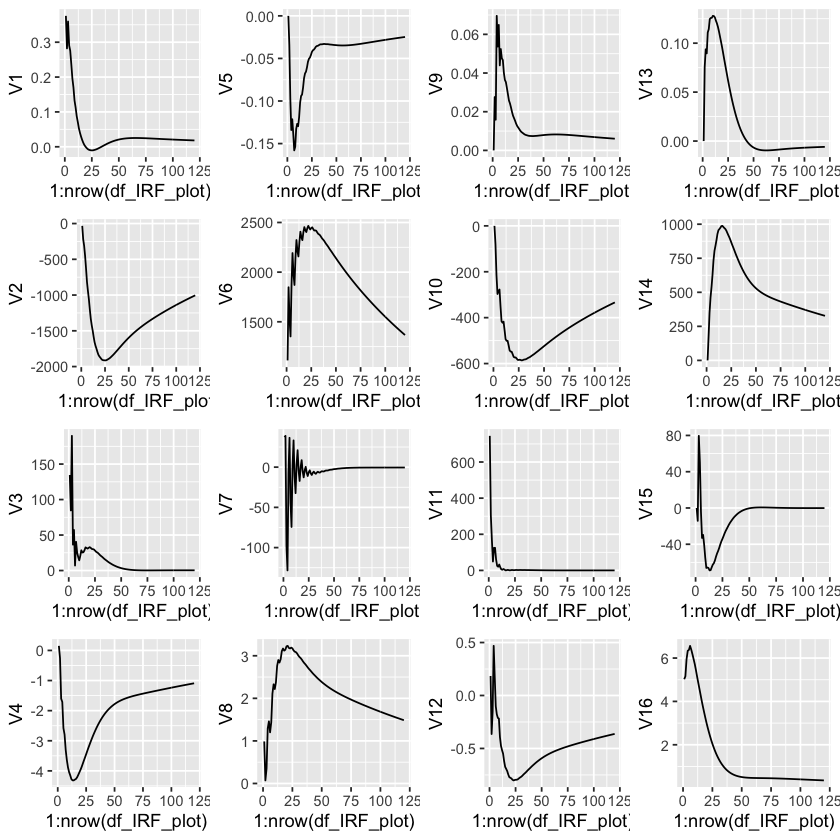

In [22]:
multiplot(p1,p2,p3,p4,
          p5,p6,p7,p8,
          p9,p10,p11,p12,
          p13,p14,p15,p16,
          cols = 4)

* 看(row3,col1)
    
    * mp shock對hs的影響是正的 -> 不合理

* 看(row4,col3)
    
    * hs shock對hp的影響是正的 -> 不合理
    

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

# Bootstrap C.I.

* http://www.eviews.com/help/helpintro.html#page/content%2Fmodels-Solving_the_Model.html%23ww100137

Typically, you will first analyze a model using deterministic simulation, and then later proceed to stochastic simulation to get an idea of the sensitivity of the results to various sorts of error. You should generally make sure that the model can be solved deterministically and is behaving as expected before trying a stochastic simulation, since stochastic simulation can be very time consuming.

The next option is the Dynamics box. This option determines how EViews uses historical data for the endogenous variables when solving the model:

• When Dynamic solution is chosen, only values of the endogenous variables from before the solution sample are used when forming the forecast. Lagged endogenous variables and ARMA terms in the model are calculated using the solutions calculated in previous periods, not from actual historical values. A dynamic solution is typically the correct method to use when forecasting values several periods into the future (a multi-step forecast), or evaluating how a multi-step forecast would have performed historically.

• When Static solution is chosen, values of the endogenous variables up to the previous period are used each time the model is solved. Lagged endogenous variables and ARMA terms in the model are based on actual values of the endogenous variables. A static solution is typically used to produce a set of one-step ahead forecasts over the historical data so as to examine the historical fit of the model. A static solution cannot be used to predict more than one observation into the future.

• When the Fit option is selected, values of the endogenous variables for the current period are used when the model is solved. All endogenous variables except the one variable for the equation being evaluated are replaced by their actual values. The fit option can be used to examine the fit of each of the equations in the model when considered separately, ignoring their interdependence in the model. The fit option can only be used for periods when historical values are available for all the endogenous variables.
In addition to these options, the Structural checkbox gives you the option of ignoring any ARMA specifications that appear in the equations of the model.

In [23]:
#```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)

# dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 16 coef if 4 variables; 55 coef if 5 variables
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU
BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}

Theta.unit= VAR.Theta(Coef, h, BSigma.u, CONST)$unit # 估算 Theta.unit
Theta.std = VAR.Theta(Coef, h, BSigma.u, CONST)$std  # 估算 Theta.std

# dm.U <- U-mean(U)
dm.U <- U

N = 1000 #重抽次數
Theta.unit.sim = vector("list", N)
Theta.std.sim  = vector("list", N)

dim(ddX); dim(Coef.noc); dim(dm.U)


# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,kk^2,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){

  #cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ] #initial values

  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]

    # predicted values given the above initial values
    last.y= c(t(By[VAR.P:1,]))
    for(ii in 1:T){
         last.y = last.y[1:(kk*VAR.P)]
         Y.sim[ii+VAR.P, ] = Coef.noc %*% last.y + const + U.sim[ii,]      # Step 4 模擬資料
         last.y = c(Y.sim[ii+VAR.P,], last.y)
      }
  
#   Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = T.total-VAR.P, ncol = kk, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  
    
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###

    Y_pseudo     = VAR.Y(Y.sim, VAR.P)        # 設定 Y
    X_pseudo     = VAR.X(Y.sim, VAR.P)        # 設定 X
    Coef.OLS_pseudo    = VAR.OLS(Y_pseudo, X_pseudo, CONST)
    Sigma.OLS_pseudo   = VAR.Sigma.OLS(Y_pseudo, X_pseudo, Coef.OLS_pseudo, CONST)
    C.Prime_pseudo <- chol(Sigma.OLS_pseudo)
    C_pseudo <- t(C.Prime_pseudo)
    B0_pseudo <- diag(diag(C_pseudo), ncol = 4, nrow = 4)
    A0_pseudo <- B0_pseudo %*% solve(C_pseudo)
    SVAR_AB_est.sim <- list("A0.svar" = A0_pseudo, "B0.svar" = B0_pseudo)
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, kk^2) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:kk){
      for(i in 1:kk){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
#```

[1] 107  16

[1]  4 16

[1] 107   4

In [24]:
#```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_0205_m3-6.rds")
#```

In [25]:
df_IRF.sim <- read_rds("df_IRF.sim_0205_m3-6.rds")

In [26]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.3755884,-32.33027,134.59050,0.15185565,0.00000000000000002134708,1111.295,37.20571,0.9874340,0.00000000,0.00000,744.775907,0.1840147,0.00000000,0.00000,0.000000,5.022655
0.2996383,-337.51240,83.06313,0.06093549,-0.00776158169815417686710,1777.332,-28.29215,-0.3552558,0.07774788,-52.59256,297.039446,0.5586749,0.08559026,47.83982,-122.163820,4.898109
0.3836594,-519.62247,71.40023,-0.77898603,-0.04245046843940571829057,1457.852,-231.33856,-0.5621556,0.03530792,-172.21183,147.785043,0.1464175,0.11879757,92.90866,-43.928789,5.498959
0.3327056,-701.06310,-13.33644,-0.99802606,-0.11457518783514977767091,1195.713,-274.23222,0.1468747,0.09402411,-330.97451,-26.767119,0.4840469,0.09627241,-37.79223,-181.934774,5.472022
0.3096798,-856.11768,-48.63687,-1.64987894,-0.11133124958660475800620,1582.690,-40.32651,0.5050176,0.03320593,-359.99026,-1.941557,0.3832501,0.13084953,-63.57282,-44.346114,5.229083
0.2713400,-978.91747,-63.85376,-1.92835652,-0.11703476797484317628584,1929.726,32.16622,0.3101763,0.06058545,-236.84927,39.466041,0.1993080,0.15051658,-17.76856,-7.594929,5.145091


### 畫IRF & Bootstrap C.I.

In [27]:
df_IRF_plot.BS.L <- matrix(NA, 120, 16)
df_IRF_plot.BS.U <- matrix(NA, 120, 16)
df_IRF_plot.BS.Median <- matrix(NA, 120, 16)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 16)
for(col in 1:16){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

In [28]:
ind <- 0
for(i in 1:4){
  for(j in 1:4){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind],
                          df_IRF_plot[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean', 'Actual')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") +geom_hline(yintercept=0, color = 'grey')+ geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Actual), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4
* V1 -> V1...5

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4
* V2 -> V2...5

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4
* V3 -> V3...5

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4
* V4 -> V4...5

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4
* V5 -> V5...5

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4
* V6 -> V6...5

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4
* V7 -> V7...5

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4
* V8 -> V8...5

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4
* V9 -> V9...5

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4
* V10 -> V10...5

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4
* V11 -> V11...5

New names:
* V12 -> V12

In [29]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Household to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Household to Housing Demand Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock3
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Household to Housing Supply Shock')+Text_Size_Theme
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme

## shock4
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Household to Housing Speculation Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

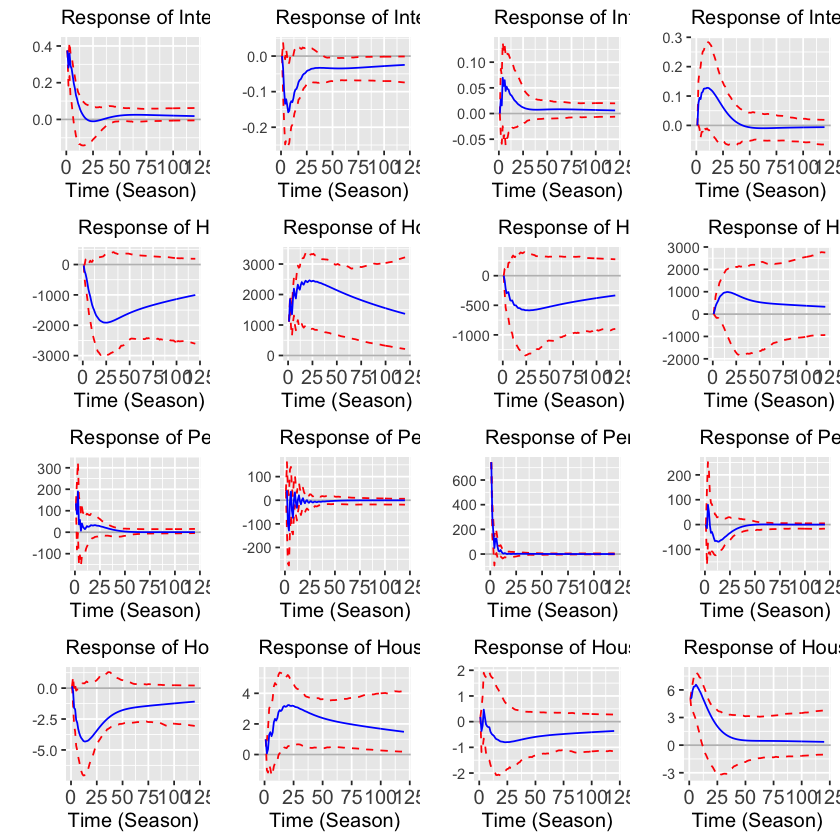

In [30]:
multiplot(p1,p2,p3,p4,
          p5,p6,p7,p8,
          p9,p10,p11,p12,
          p13,p14,p15,p16,
          cols = 4)

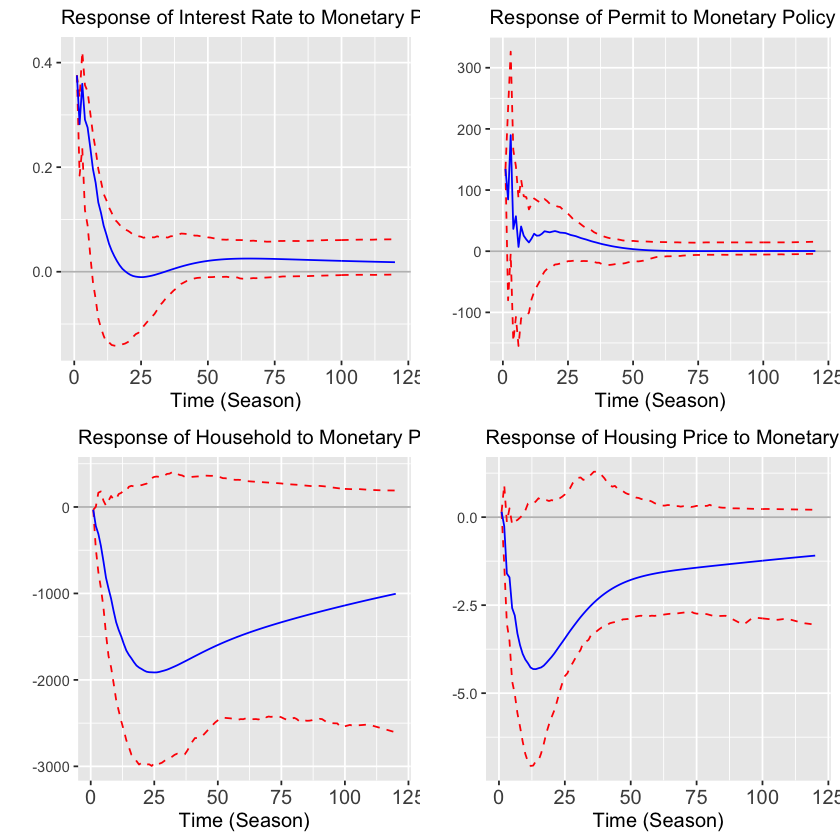

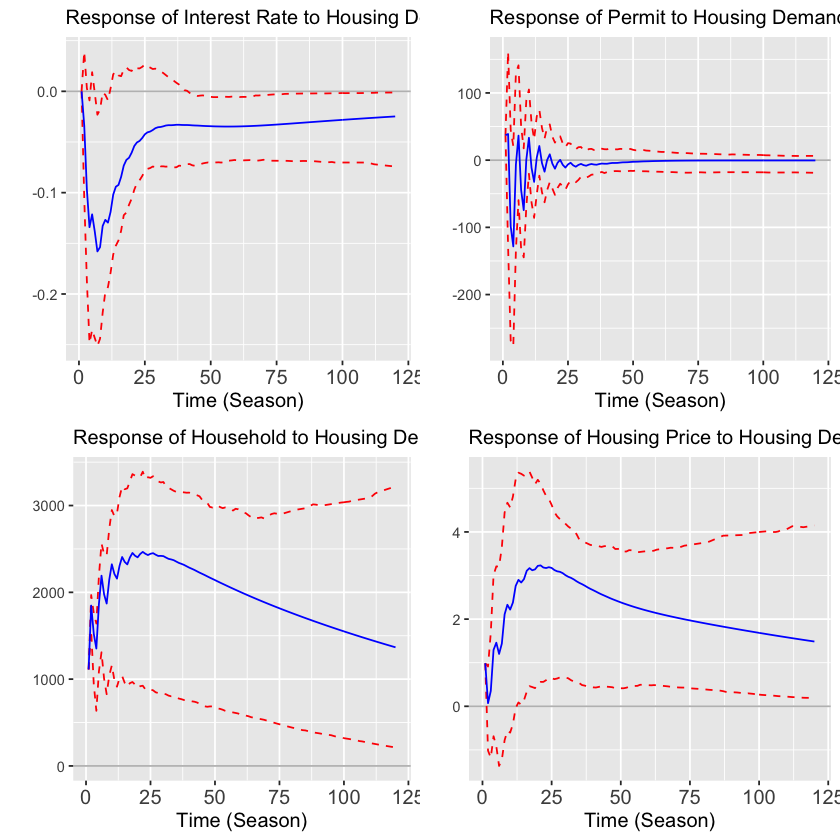

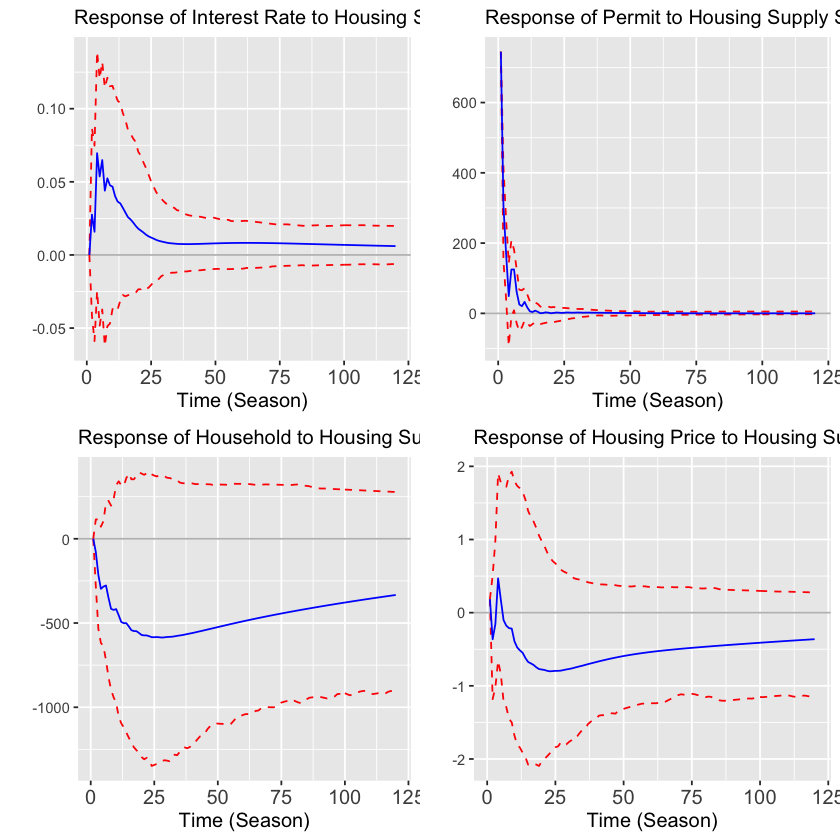

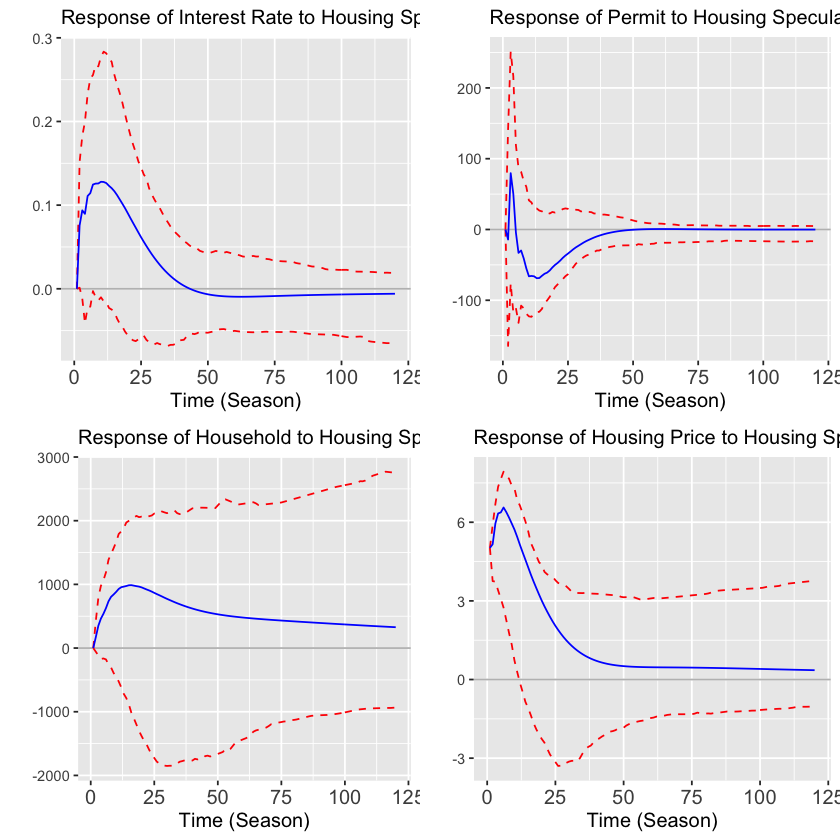

In [31]:
# For shock 1
multiplot(p1,p2,p3,p4,
          cols = 2)
# For shock 2
multiplot(p5,p6,p7,p8,
          cols = 2)
# For shock 3
multiplot(p9,p10,p11,p12,
          cols = 2)
# For shock 4
multiplot(p13,p14,p15,p16,
          cols = 2)


* mp shock對hs的影響是正的 -> 不合理 -> 不顯著

* hs shock對hp的影響是正的 -> 不合理 -> 不顯著

* sp shock對demand的影響是正的 -> 不合理 -> 不顯著

* sp shock對supply的影響是負的 -> 不合理 -> 不顯著
    

In [32]:
# save plot
# shock 1
ggsave(filename = "result/figure/0205_m3-6-chol_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 2
ggsave(filename = "result/figure/0205_m3-6-chol_IRF_shock2.png", 
       plot = multiplot(p5,p6,p7,p8, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "result/figure/0205_m3-6-chol_IRF_shock3.png", 
       plot = multiplot(p9,p10,p11,p12, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "result/figure/0205_m3-6-chol_IRF_shock4.png", 
       plot = multiplot(p13,p14,p15,p16, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [33]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 4, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
head(SVAR_AB_VarDecomp*100)
tail(SVAR_AB_VarDecomp*100)

h=1,0.08781799,3.713110,0.1289515,96.07012
h=2,0.16507267,1.846611,0.3131479,97.67517
h=3,2.91077675,1.210025,0.2087116,95.67049
h=4,4.09910687,2.040578,0.3009767,93.55934
h=5,6.59257966,2.644301,0.2376440,90.52548
h=6,8.41942339,2.669011,0.1897652,88.72180


h=115,32.59464,32.25049,1.898500,33.25638
h=116,32.59462,32.30962,1.902071,33.19369
h=117,32.59460,32.36777,1.905583,33.13205
h=118,32.59458,32.42496,1.909037,33.07142
h=119,32.59456,32.48121,1.912433,33.01180
h=120,32.59454,32.53653,1.915775,32.95316


In [34]:
# output entire table
VD_TABLE <- (SVAR_AB_VarDecomp*100) %>% as.tibble %>% select(mp=1,hd=2,hs=3,hp=4)
write.table(VD_TABLE, file = "result/table/VD_TABLE.csv", sep = ",", row.names = FALSE)

In [35]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           hd = V2,
           hs = V3,
           sp = V4) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           hd = round(hd, digits = 2),
           hs = round(hs, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

period,mp,hd,hs,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.09,3.71,0.13,96.07
2,0.17,1.85,0.31,97.68
4,4.10,2.04,0.30,93.56
8,12.70,3.70,0.15,83.44
12,19.73,6.49,0.22,73.57
20,27.78,12.26,0.56,59.40
40,32.44,21.77,1.24,44.55
60,32.64,25.59,1.49,40.28
80,32.60,30.10,1.77,35.54


In [36]:
library(xtable)

In [37]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c"))
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 09:43:21 2021
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
period & mp & hd & hs & sp \\ 
  \hline
1 & 0.09 & 3.71 & 0.13 & 96.07 \\ 
  2 & 0.17 & 1.85 & 0.31 & 97.68 \\ 
  4 & 4.10 & 2.04 & 0.30 & 93.56 \\ 
  8 & 12.70 & 3.70 & 0.15 & 83.44 \\ 
  12 & 19.73 & 6.49 & 0.22 & 73.57 \\ 
  20 & 27.78 & 12.26 & 0.56 & 59.40 \\ 
  40 & 32.44 & 21.77 & 1.24 & 44.55 \\ 
  60 & 32.64 & 25.59 & 1.49 & 40.28 \\ 
  80 & 32.60 & 30.10 & 1.77 & 35.54 \\ 
  120 & 32.59 & 31.74 & 1.87 & 33.80 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [38]:
print(tab_VD, file="result/table/0205_m3-6-chol.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [39]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 111  16

In [40]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

9,7.217000,822487.3,4887.000,107.8000
10,6.725333,824062.7,5103.000,109.0800
11,5.692000,824012.0,8367.000,114.8400
12,5.783333,823259.7,8946.000,116.0600
,6.041369,824504.8,5038.340,119.9458
,6.500790,827303.6,3795.251,124.0643


[1] 111   4

[1] 111   4

In [41]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,household,permit_hh,hp
9,0.0000000,0.000,0.0000,0.000000
10,0.0000000,0.000,0.0000,0.000000
11,0.0000000,0.000,0.0000,0.000000
12,0.0000000,0.000,0.0000,0.000000
13,0.3969646,-1133.421,307.6604,-4.235782
14,-1.1137902,-1278.584,-1188.2506,-4.384312


In [42]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,5,9,13)])

NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
0.3969646,-34.17031,142.2506,0.1604983
-1.1022462,-111.84640,-412.3689,-0.8348093


In [43]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
tail(cbind((By-SVAR_AB_Hist.c0)[,4], 
      (SVAR_AB_HistDecomp[,c(1,5,9,13)])[,4]))

114,-1.604025,4.409334
115,-5.922474,2.840073
116,-8.299270,1.447310
117,-11.064497,0.429757
118,-5.628238,-1.292498
119,3.719428,-2.319106


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



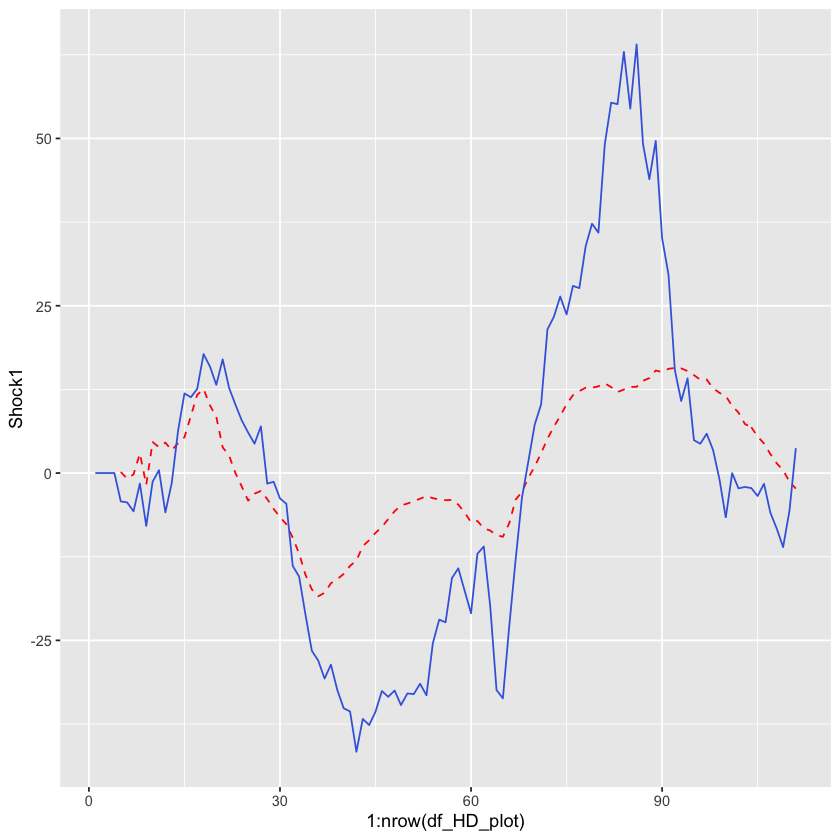

In [44]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(1,5,9,13)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')



### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



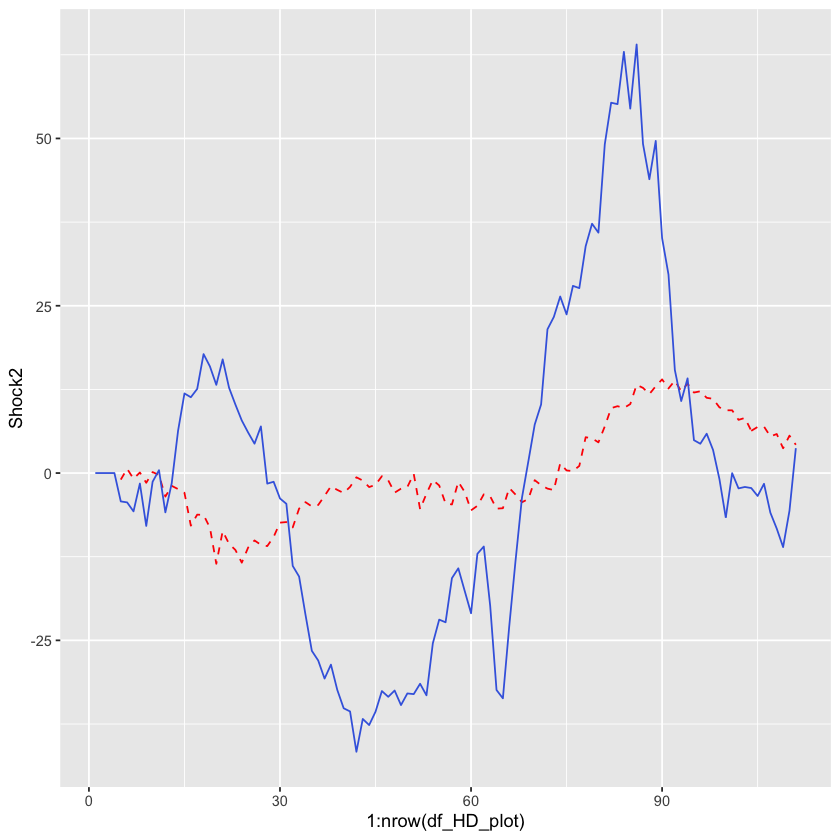

In [45]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(2,6,10,14)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



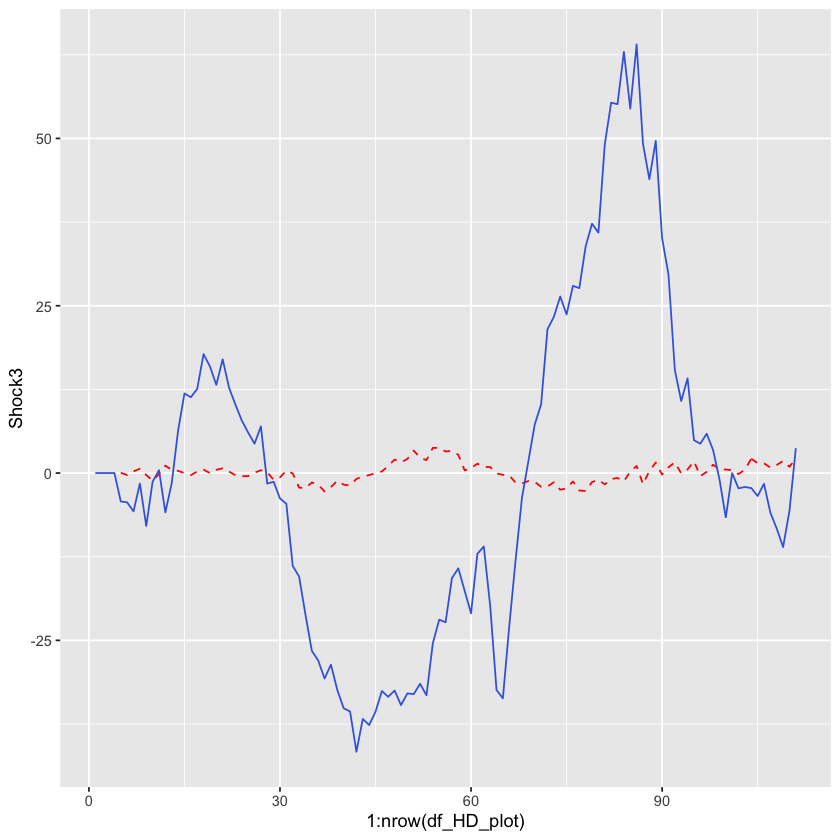

In [46]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(3,7,11,15)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



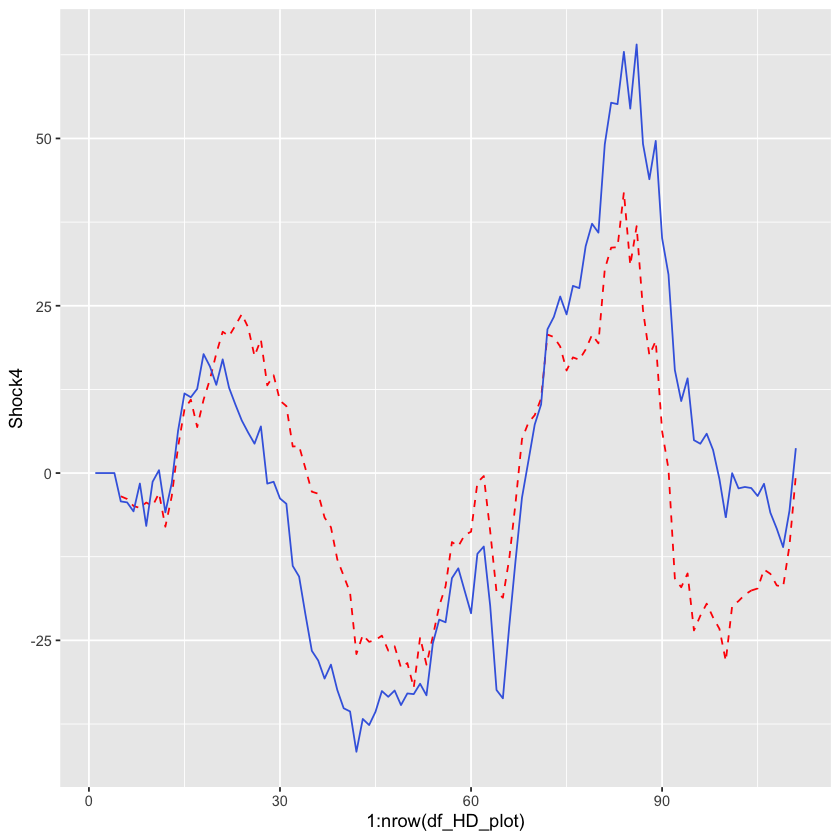

In [47]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(4,8,12,16)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [48]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1993
for(q in 1:111){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [49]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,4],
                   SVAR_AB_HistDecomp[,13],
                   SVAR_AB_HistDecomp[,14],
                   SVAR_AB_HistDecomp[,15],
                   SVAR_AB_HistDecomp[,16])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "hd", "hs", "sp")
tail(df_HD)

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



Time,Year,Season,BaseLine,mp,hd,hs,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019Q2,2019,2,-1.604025,4.409334,6.942830,1.4598054,-14.415883
2019Q3,2019,3,-5.922474,2.840073,5.473292,0.8201990,-15.055925
2019Q4,2019,4,-8.299270,1.447310,5.833556,1.2049762,-16.784999
2020Q1,2020,1,-11.064497,0.429757,3.702806,1.8169179,-17.013864
2020Q2,2020,2,-5.628238,-1.292498,5.591677,0.9286381,-10.855939
2020Q3,2020,3,3.719428,-2.319106,4.227154,2.1769678,-0.365471


In [50]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hd = hd/BaseLine*100,
                    hs = hs/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          hd = median(hd),
          hs = median(hs),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hd = hd/BaseLine*100,
                    hs = hs/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          hd = median(hd),
          hs = median(hs),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hd = hd/BaseLine*100,
                    hs = hs/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = median(mp),
          hd = median(hd),
          hs = median(hs),
          sp = median(sp))

In [51]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)
HD.table <- bind_cols(c("全樣本(1993Q1-2020Q3)","房價持平期(1993Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock", 
                        "Housing Demand Shock",
                        "Housing Supply Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Demand Shock,Housing Supply Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1993Q1-2020Q3),28.59030,8.4649607,-2.222611,64.94801
房價持平期(1993Q1-2002Q4),53.19455,0.6875201,2.360044,70.99968
房價上升期(2003Q1-2020Q3),27.27568,9.2797216,-4.475554,64.94801


In [52]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c"))
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 09:43:22 2021
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Demand Shock & Housing Supply Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1993Q1-2020Q3) & 28.59 & 8.46 & -2.22 & 64.95 \\ 
  房價持平期(1993Q1-2002Q4) & 53.19 & 0.69 & 2.36 & 71.00 \\ 
  房價上升期(2003Q1-2020Q3) & 27.28 & 9.28 & -4.48 & 64.95 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [53]:
print(tab_HD, include.rownames=FALSE,
      file="result/table/0205_m3-6-chol_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

In [54]:
xlab <- lubridate::yq(df_HD$Time)

In [55]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 2
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 3
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 4
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [56]:
# save shock 1
ggsave(filename = "result/figure/0205_m3-6-chol_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "result/figure/0205_m3-6-chol_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "result/figure/0205_m3-6-chol_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "result/figure/0205_m3-6-chol_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")

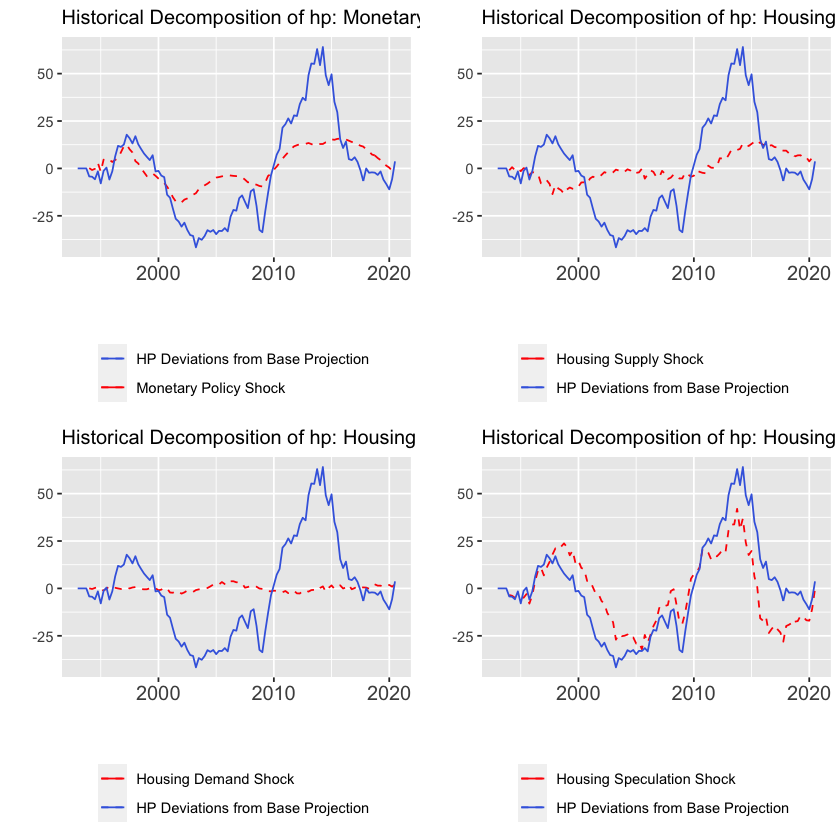

In [57]:
# For hp
multiplot(figure_HD.1,figure_HD.2,figure_HD.3,figure_HD.4,
          cols = 2)
ggsave(filename = "result/figure/HD.png", 
       plot = multiplot(figure_HD.1,
                        figure_HD.2,
                        figure_HD.3,
                        figure_HD.4,
                        cols = 2),
       width = 15*2, height = 10*2, units = "cm",
       device = "png")